##**05 - Random Forest**

## **1. Importaciones**

In [63]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from numpy.random import seed, choice
from imblearn.metrics import specificity_score
from sklearn.metrics import *








## **2.Subir el Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving internal-link.csv to internal-link.csv


## **3. Abrir el Dataset**

In [3]:
df = pd.read_csv('internal-link.csv')
pd.set_option('display.max_columns', None)
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## **4. Entender el Dataset**

In [4]:
for column in df.columns:
    print(column, df[column].nunique())
for column in df.columns:
    print(column, df[column].unique())

Pregnancies 17
Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52
Outcome 2
Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness [35 29  0 23 32 45 19 47 38

In [5]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


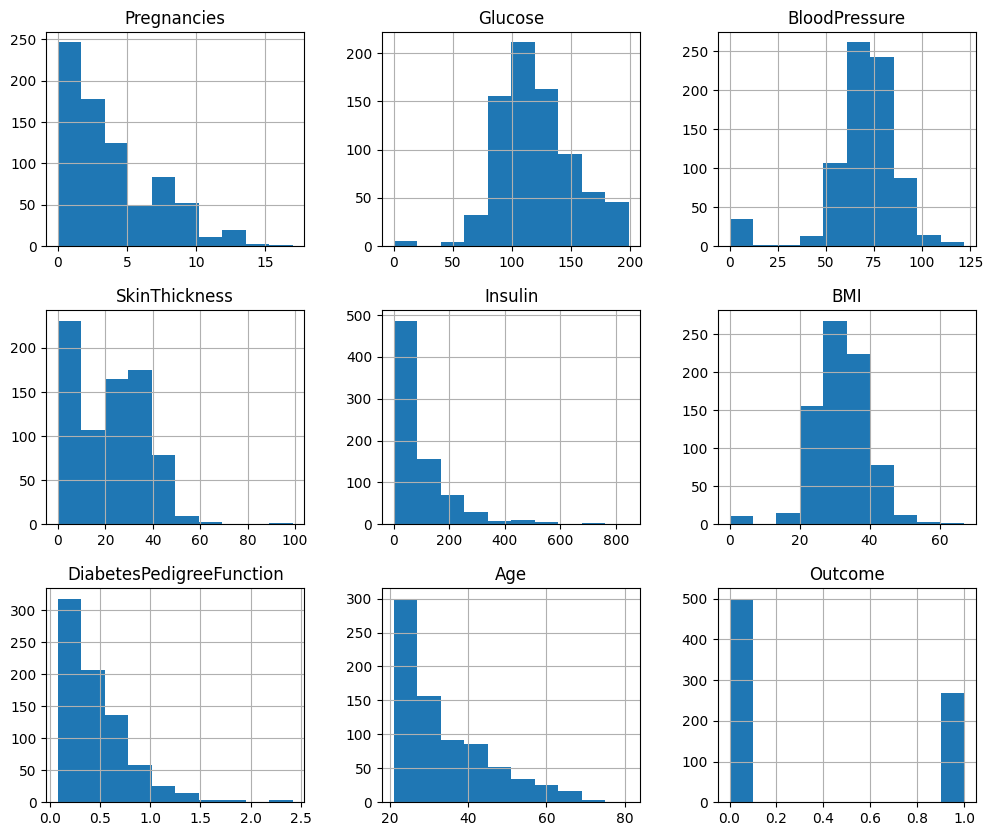

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10))
plt.show()

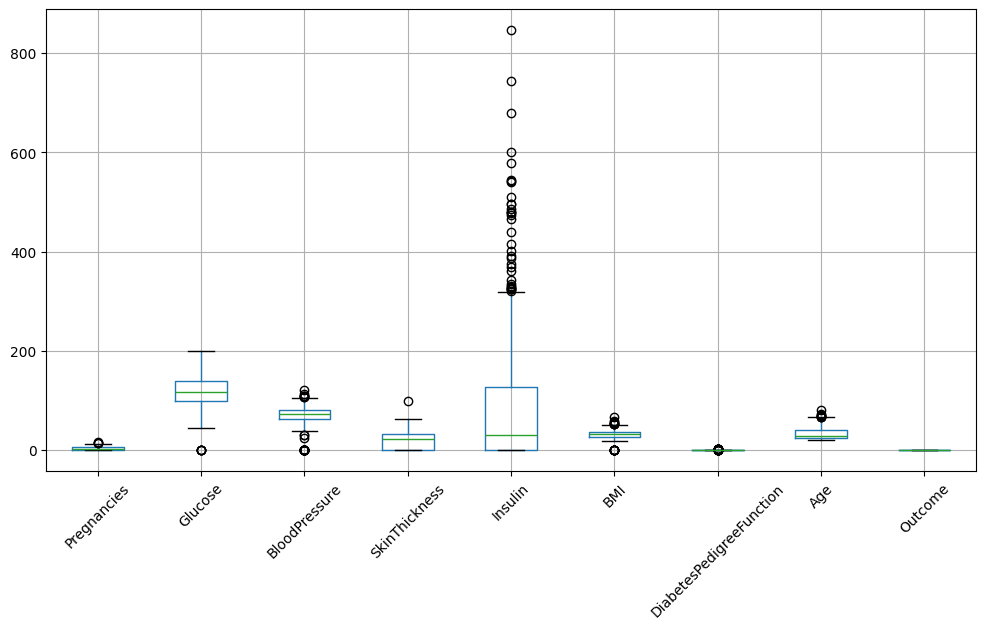

In [7]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

## **5. Descripción de las Variables**

In [8]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: Pregnancies
             Conteo  Porcentaje (%)
Pregnancies                        
1               135           17.58
0               111           14.45
2               103           13.41
3                75            9.77
4                68            8.85
5                57            7.42
6                50            6.51
7                45            5.86
8                38            4.95
9                28            3.65
10               24            3.12
11               11            1.43
13               10            1.30
12                9            1.17
14                2            0.26
17                1            0.13
15                1            0.13

Columna: Glucose
         Conteo  Porcentaje (%)
Glucose                        
99           17            2.21
100          17            2.21
111          14            1.82
125          14            1.82
129          14            1.82
...         ...             ...
56            1     

## **6. Cribado Manual** Se hizo en el Proyecto DecissionTree. No se elimino nada.

## **7. Analizar valores sin sentido** Glucosa hay valores de 30 a 600. Presión Arterial de 30 a 200. SkinThickness hay valores de cero a 99. Insulin de 0 a 300. BMI de 10 a 60. y de DiabetesPedigreeFunction de 0 a 2.5

In [9]:
df_clean = df.copy()
df_clean.loc[(df_clean["Glucose"] < 30) | (df_clean["Glucose"] > 600), "Glucose"] = np.nan
df_clean.loc[(df_clean["BloodPressure"] < 30) | (df_clean["BloodPressure"] > 200), "BloodPressure"] = np.nan
df_clean.loc[(df_clean["SkinThickness"] < 0) | (df_clean["SkinThickness"] > 99), "SkinThickness"] = np.nan
df_clean.loc[(df_clean["Insulin"] < 0) | (df_clean["Insulin"] > 300), "Insulin"] = np.nan
df_clean.loc[(df_clean["BMI"] < 10) | (df_clean["BMI"] > 60), "BMI"] = np.nan
df_clean.loc[(df_clean["DiabetesPedigreeFunction"] < 0) | (df_clean["DiabetesPedigreeFunction"] > 2.5), "DiabetesPedigreeFunction"] = np.nan

df_clean.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,0.0,0.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,NaN,30.5,0.158,53,1
9,8,125.0,96.0,0.0,0.0,NaN,0.232,54,1


## **8. Valores faltantes por columnas** Tiene que ser mayor a 40 % Para poder eliminarlas. No eliminamos ninguna.

In [10]:
df_clean.shape

(768, 9)

In [11]:
faltantes = df_clean.isna().mean()*100
faltantes[faltantes>0]

,0
Glucose,0.651042
BloodPressure,4.687500
Insulin,4.817708
BMI,1.562500


## **9. Valores Faltantes por Filas.** No eliminamos ninguna

In [12]:
df_clean.isnull().any(axis=1).sum()

np.int64(83)

In [13]:
n = 2
df_clean[df_clean.isnull().sum(axis=1) == n]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105.0,NaN,0.0,0.0,NaN,0.305,24,0
60,2,84.0,NaN,0.0,0.0,NaN,0.304,21,0
81,2,74.0,NaN,0.0,0.0,NaN,0.102,22,0
426,0,94.0,NaN,0.0,0.0,NaN,0.256,25,0
494,3,80.0,NaN,0.0,0.0,NaN,0.174,22,0
522,6,114.0,NaN,0.0,0.0,NaN,0.189,26,0
706,10,115.0,NaN,0.0,0.0,NaN,0.261,30,1


In [14]:
n = 3
df_clean[df_clean.isnull().sum(axis=1) == n]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: >

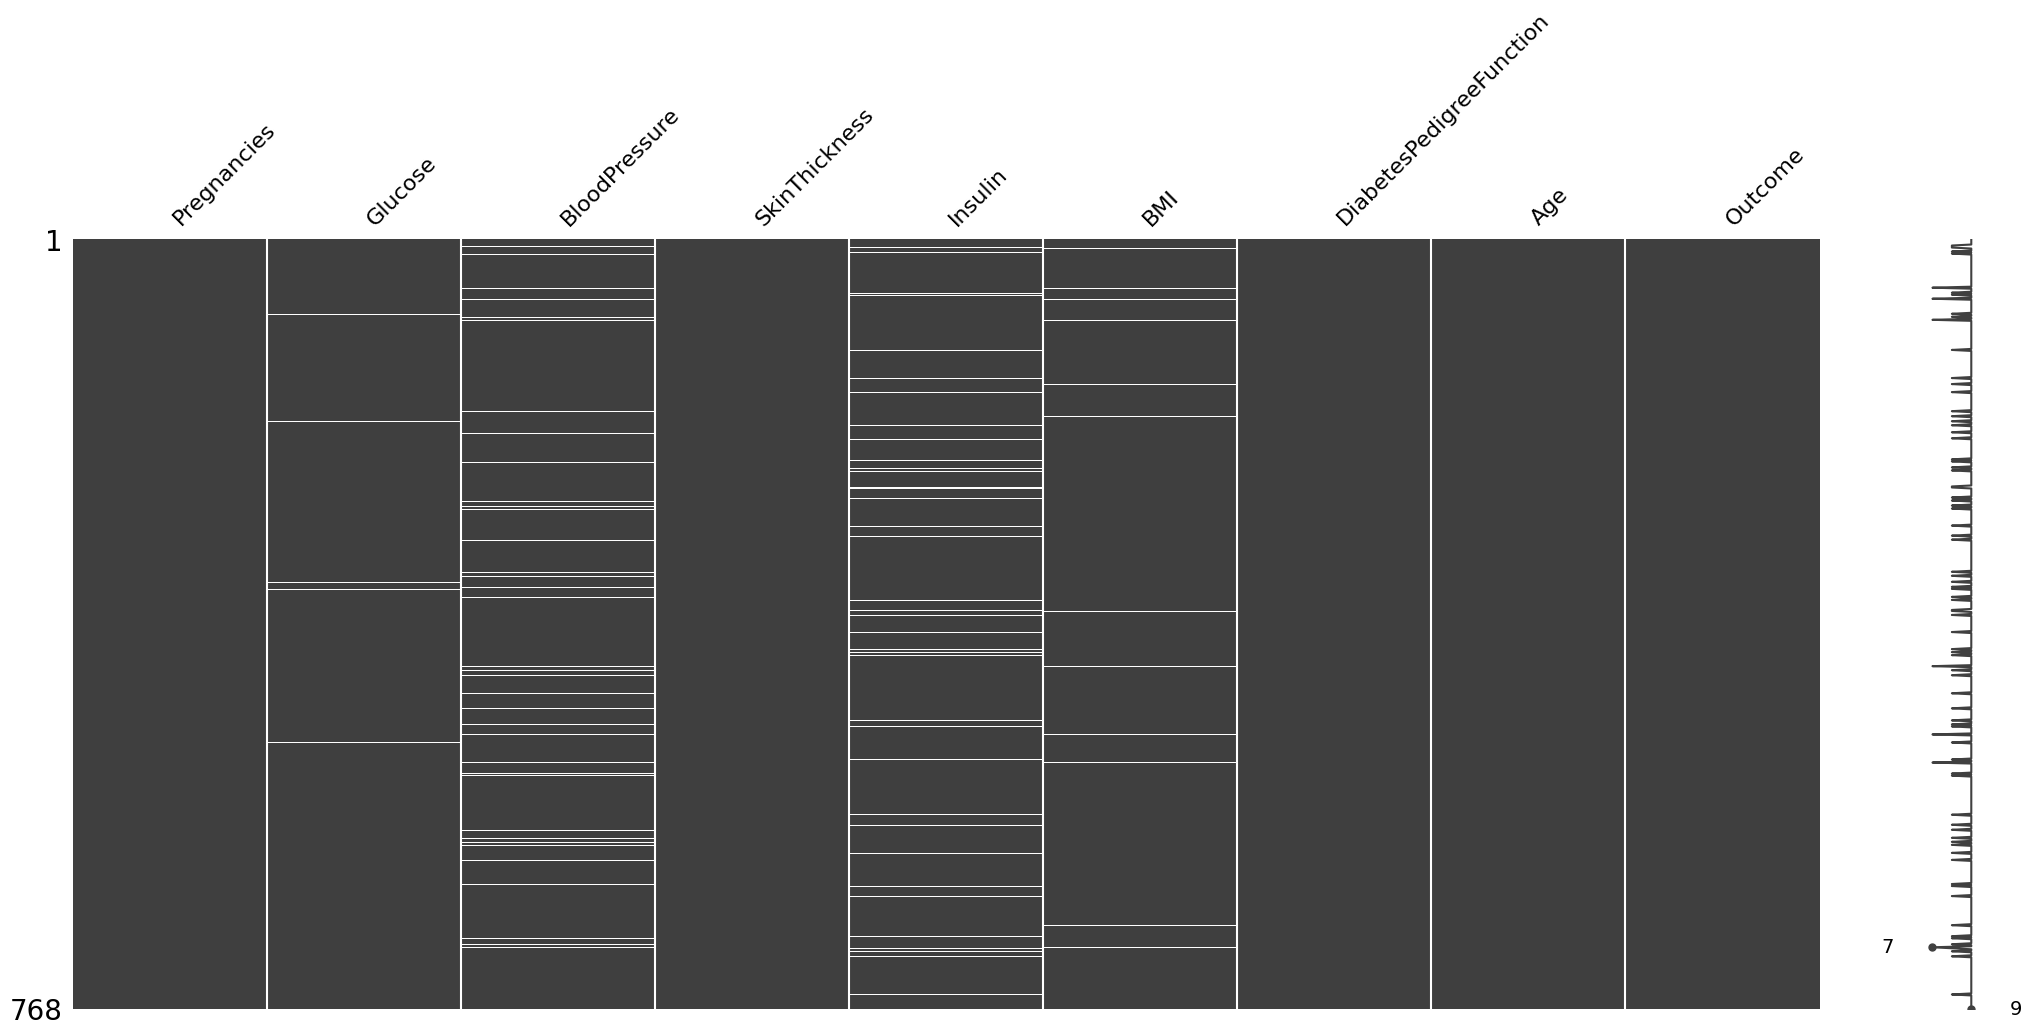

In [15]:
msno.matrix(df_clean)

## **10. Train Test-Split**

In [16]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **11.Imputar**

In [18]:
X_train[['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin', 'BMI']]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
60,84,0,0,0,0.0
618,112,82,24,0,28.2
346,139,46,19,83,28.7
294,161,50,0,0,21.9
231,134,80,37,370,46.2
...,...,...,...,...,...
71,139,64,35,140,28.6
106,96,122,0,0,22.4
270,101,86,37,0,45.6
435,141,0,0,0,42.4


In [19]:
X_train['Glucose'].value_counts(normalize=True)*100

,proportion
Glucose,
99,2.605863
100,2.442997
125,2.117264
108,1.954397
106,1.954397
...,...
198,0.162866
178,0.162866
167,0.162866


In [20]:
X_train['SkinThickness'].value_counts(normalize=True)*100

,proportion
SkinThickness,
0,28.664495
30,3.908795
32,3.745928
23,3.420195
27,2.768730
33,2.768730
19,2.768730
18,2.605863
39,2.605863


In [21]:
X_train['Insulin'].value_counts(normalize=True)*100

,proportion
Insulin,
0,47.231270
105,1.791531
140,1.465798
130,1.140065
120,1.140065
...,...
55,0.162866
85,0.162866
61,0.162866


In [22]:
X_train['BMI'].value_counts(normalize=True)*100

,proportion
BMI,
32.0,1.954397
31.6,1.791531
31.2,1.628664
30.1,1.465798
32.4,1.465798
...,...
49.6,0.162866
22.3,0.162866
33.5,0.162866


In [23]:
cols_imputar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X_train_imp = X_train.copy()
imputer = KNNImputer(n_neighbors=5)  # puedes cambiar el número de vecinos
X_train_imp[cols_imputar] = imputer.fit_transform(X_train_imp[cols_imputar])

In [24]:
X_test_imp = X_test.copy()
X_test_imp[cols_imputar] = imputer.transform(X_test_imp[cols_imputar])

## **12. Chequear los OUTLIERS**

In [25]:
X_train_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.742671,3.313264,0.000,1.0000,3.0000,6.00000,17.00
Glucose,614.0,120.855049,32.035057,0.000,100.0000,117.0000,139.00000,199.00
BloodPressure,614.0,69.415309,18.512599,0.000,64.0000,72.0000,80.00000,122.00
SkinThickness,614.0,20.399023,15.433974,0.000,0.0000,23.0000,32.00000,63.00
Insulin,614.0,81.438111,116.234835,0.000,0.0000,42.5000,129.75000,846.00
BMI,614.0,31.983388,7.740625,0.000,27.1000,32.0000,36.37500,67.10
DiabetesPedigreeFunction,614.0,0.469168,0.336847,0.078,0.2415,0.3725,0.61375,2.42
Age,614.0,32.907166,11.503437,21.000,24.0000,29.0000,40.00000,81.00


In [26]:
iso = IsolationForest(random_state=123)
df_num = X_train_imp.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train_imp)

In [27]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
1,544
-1,70


## **13.  Selección de Características**

Método 1: Feature importance de RF

In [28]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Importancia de características
importances = model.feature_importances_ / model.feature_importances_.sum() * 100

# Convertir a DataFrame
df_dt_imp = pd.DataFrame({
    'feature': X_train_imp.columns,
    'dt_importance': importances
}).sort_values(by='dt_importance', ascending=False)

# Calculamos la importancia acumulada
df_dt_imp['dt_importance_acum'] = df_dt_imp['dt_importance'].cumsum()

In [30]:
df_dt_imp

,feature,dt_importance,dt_importance_acum
1,Glucose,32.514916,32.514916
5,BMI,15.586175,48.101092
7,Age,13.355625,61.456717
6,DiabetesPedigreeFunction,12.183604,73.640320
2,BloodPressure,9.073368,82.713689
4,Insulin,5.966554,88.680243
0,Pregnancies,5.716083,94.396326
3,SkinThickness,5.603674,100.000000


Método 2: Permutation/Shuffle importance

In [31]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(
    X_train_imp, y_train, test_size=0.2, random_state=42
)

# Ajustar modelo Decision Tree (regresión)
model_dt = RandomForestRegressor(random_state=42)
model_dt.fit(X_train1, y_train1)

RandomForestRegressor(random_state=42)

In [32]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(
    model_dt,
    X_val,
    y_val,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_absolute_percentage_error'
)

In [33]:
df_perm_imp = pd.DataFrame({
    'feature': X_train_imp.columns,
    'perm_imp': perm.importances_mean * 100
}).sort_values('perm_imp', ascending=False)

df_perm_imp

,feature,perm_imp
1,Glucose,2.061038e+16
0,Pregnancies,9.596695e+15
7,Age,8.501917e+15
5,BMI,7.524307e+15
4,Insulin,1.834393e+15
3,SkinThickness,1.633013e+15
6,DiabetesPedigreeFunction,1.523169e+15
2,BloodPressure,5.309122e+14


Método 3: SHAP


In [34]:
# Ajustamos el modelo
model_dt = RandomForestRegressor(random_state=42)
model_dt.fit(X_train1, y_train1)

explainer = shap.TreeExplainer(model_dt)
shap_vals = explainer.shap_values(X_val)

In [35]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap / imp_shap.sum() * 100

df_shap_imp = pd.DataFrame({
    "feature": X_val.columns,
    "shap_imp": imp_shap_pct
}).sort_values("shap_imp", ascending=False)

In [36]:
# --- SHAP Summary Bar Plot ---
df_shap_imp

,feature,shap_imp
1,Glucose,31.066598
7,Age,21.242057
5,BMI,18.201032
6,DiabetesPedigreeFunction,12.183862
2,BloodPressure,5.422924
0,Pregnancies,4.717821
3,SkinThickness,4.465268
4,Insulin,2.700439


Unión 3 métodos

In [37]:
df_importances = (
    df_dt_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('dt_importance', ascending=False)

df_importances

,feature,dt_importance,dt_importance_acum,perm_imp,shap_imp
4,Glucose,32.514916,32.514916,2.061038e+16,31.066598
1,BMI,15.586175,48.101092,7.524307e+15,18.201032
0,Age,13.355625,61.456717,8.501917e+15,21.242057
3,DiabetesPedigreeFunction,12.183604,73.640320,1.523169e+15,12.183862
2,BloodPressure,9.073368,82.713689,5.309122e+14,5.422924
5,Insulin,5.966554,88.680243,1.834393e+15,2.700439
6,Pregnancies,5.716083,94.396326,9.596695e+15,4.717821
7,SkinThickness,5.603674,100.000000,1.633013e+15,4.465268


In [38]:
df_filt = df_importances[
    (df_importances['dt_importance'] >= 1) &
    (df_importances['perm_imp'] >= 1) &
    (df_importances['shap_imp'] >= 1)
]

df_filt

,feature,dt_importance,dt_importance_acum,perm_imp,shap_imp
4,Glucose,32.514916,32.514916,2.061038e+16,31.066598
1,BMI,15.586175,48.101092,7.524307e+15,18.201032
0,Age,13.355625,61.456717,8.501917e+15,21.242057
3,DiabetesPedigreeFunction,12.183604,73.640320,1.523169e+15,12.183862
2,BloodPressure,9.073368,82.713689,5.309122e+14,5.422924
5,Insulin,5.966554,88.680243,1.834393e+15,2.700439
6,Pregnancies,5.716083,94.396326,9.596695e+15,4.717821
7,SkinThickness,5.603674,100.000000,1.633013e+15,4.465268


##**13. Medir Correlación de Variables**

In [39]:
features = df_filt['feature']
features

,feature
4,Glucose
1,BMI
0,Age
3,DiabetesPedigreeFunction
2,BloodPressure
5,Insulin
6,Pregnancies
7,SkinThickness


In [40]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
Glucose,1.333802
BMI,1.277398
Age,1.620846
DiabetesPedigreeFunction,1.058426
BloodPressure,1.162375
Insulin,1.452568
Pregnancies,1.450741
SkinThickness,1.534159


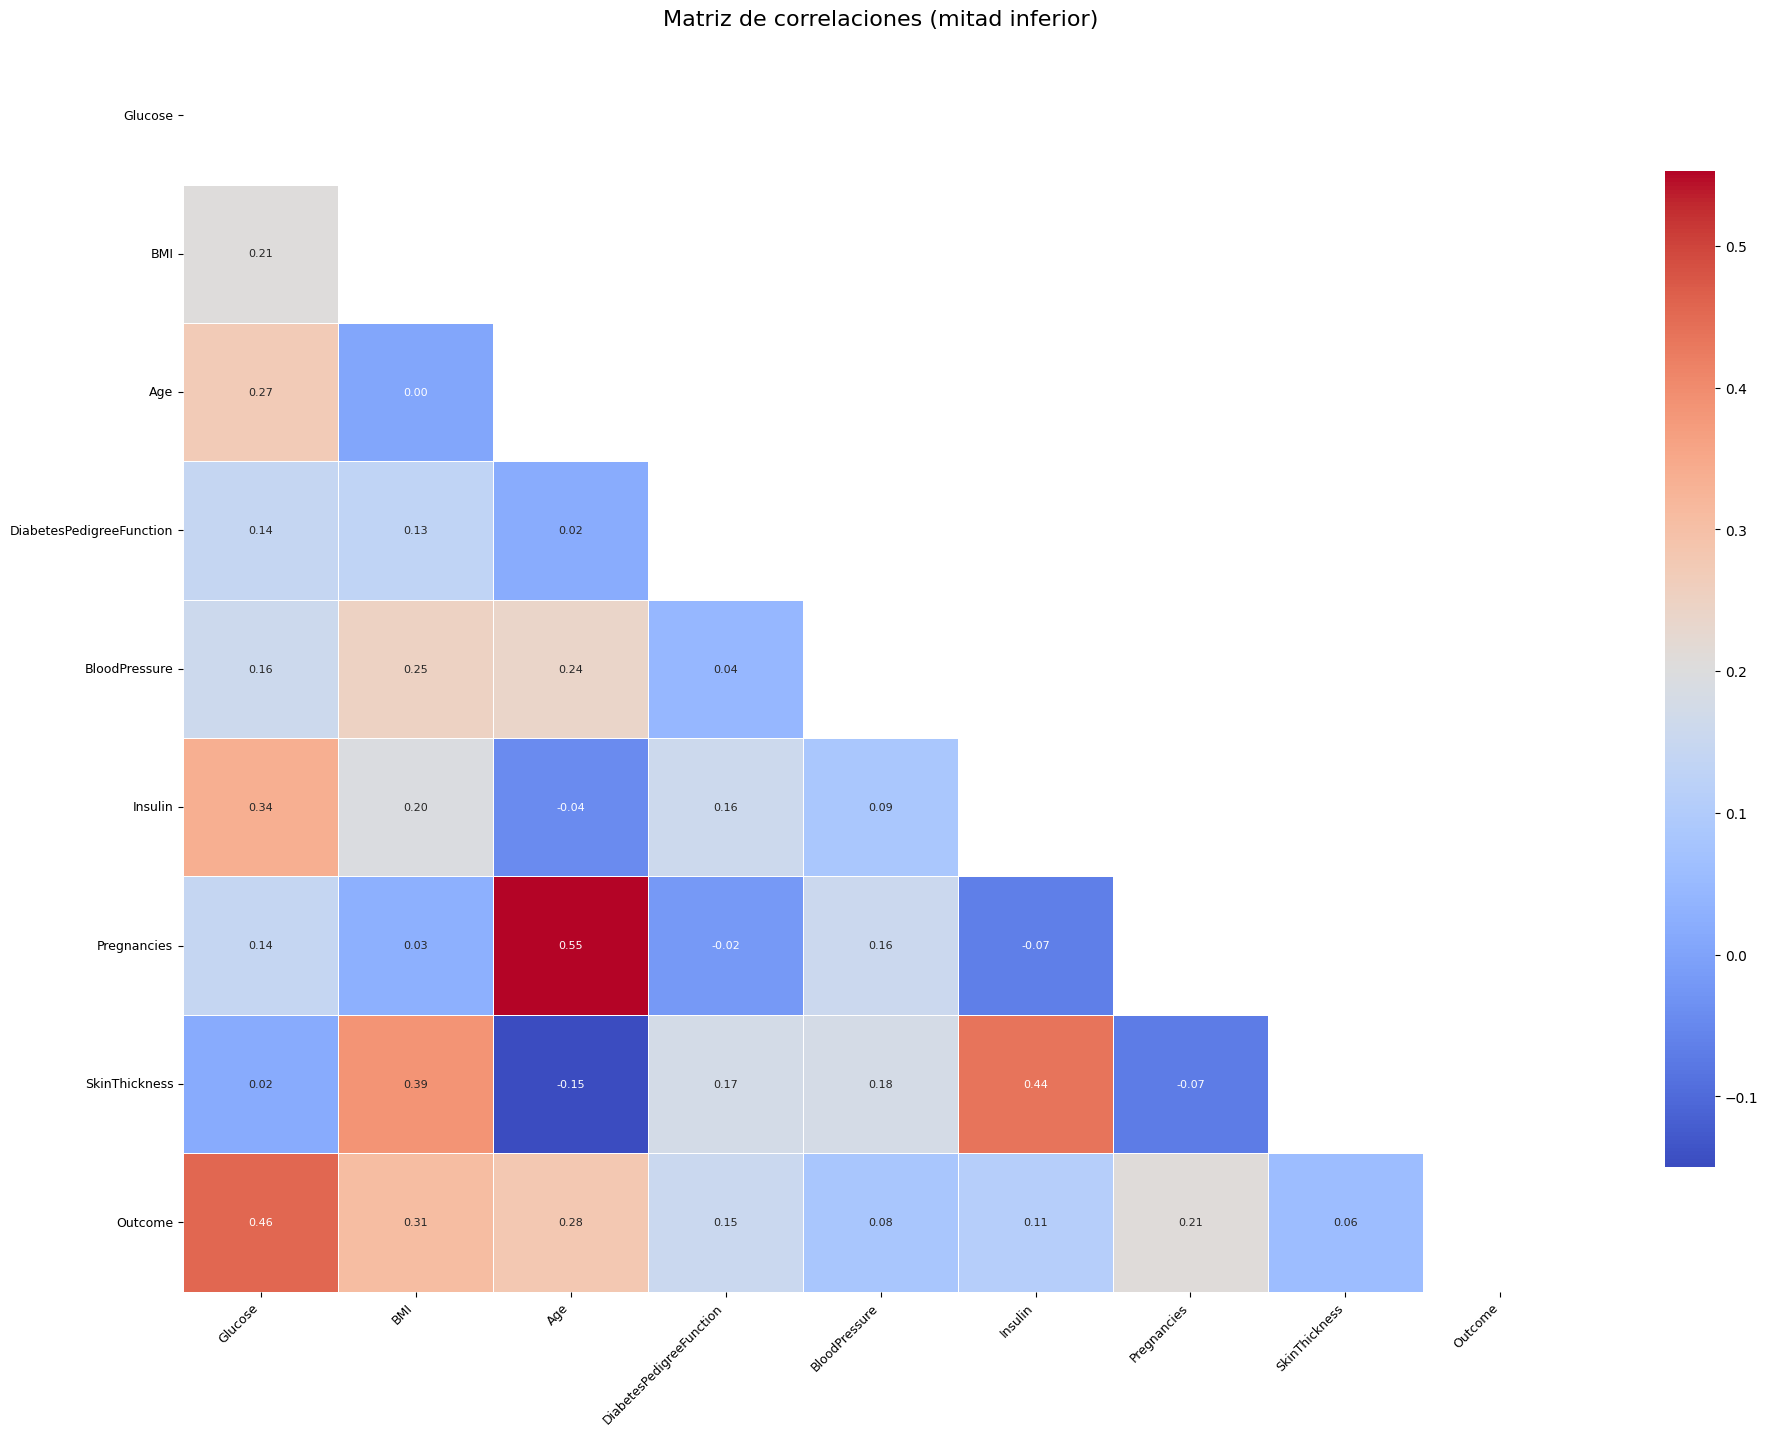

In [41]:
X_copy = X_train[features].copy()
X_copy['Outcome'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## **14.Cross Validation**

In [42]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results_dt = cross_val_score(
    RandomForestRegressor(random_state=42),
    X_train[features],
    y_train,
    cv=3,
    scoring='neg_mean_absolute_percentage_error'
)

print(cv_results_dt)
print("MAPE medio:", -cv_results_dt.mean())

[-7.19038126e+14 -6.84547143e+14 -6.30062418e+14]
MAPE medio: 677882562563108.4


In [43]:
# Versión 2: Realizar cross_validation con  las características que son candidatas sin las correlacionadas
cv_results2 = cross_val_score(RandomForestRegressor(random_state=42), X_train[features].drop(['Pregnancies'],axis=1), y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [44]:
cv_results2.mean()*-1

np.float64(676509513896227.1)

## **15.Modelado y Entrenamiento**

In [59]:
class RandomForestBootstrap:

    def __init__(self, n_estimators, random_state, max_depth, min_samples_leaf, max_features, X, y):
      self.n_estimators = n_estimators
      self.random_state = random_state
      self.max_depth = max_depth
      self.min_samples_leaf = min_samples_leaf
      self.max_features = max_features
      self.X = X.values
      self.y = y.values
      self.models = []

    def get_bootstrap_datasets(self):
        # Método para obtener conjuntos de datos bootstrap
        seed(self.random_state) # Se utiliza una semilla aleatoria para reproducir el experimento
        # Genera los índices bootstrap
        idxs = [choice(len(self.X), len(self.X), replace=True) for _ in range(self.n_estimators)]
        # Selección aleatoria de índices de características (max_features)
        feature_idxs = [choice(range(self.X.shape[1]), self.max_features, replace=False) for _ in range(self.n_estimators)]
        # Retorna los índices de las columnas y los datasets bootstrap como una lista de tuplas (X_bootstrap, y_bootstrap)
        return feature_idxs, [(self.X[idxs[i],:][:,feature_idxs[i]], self.y[idxs[i]]) for i in range(self.n_estimators)]

    def fit(self):
        # Método para ajustar el modelo (entrenar los árboles del bosque)
        feature_idxs, data_sets = self.get_bootstrap_datasets()
        for i, data in enumerate(data_sets):
          X, y = data
          # Si es clasificación, se entrena un árbol de clasificación
          self.models.append((feature_idxs[i], DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, max_features=self.max_features, random_state=self.random_state).fit(X, y)))

    def predict(self, X):
      # Si hay modelos entrenados
      X = X.values
      predictions = np.vstack([model.predict(X[:,idxs]) for idxs, model in self.models])
      # Se devuelve la clase más común entre las predicciones
      predicciones = [Counter(predictions[:,i]).most_common(1)[0][0] for i in range(predictions.shape[1])]
      return predicciones

In [61]:
# Crear y entrenar un bosque simple
rf_simple = RandomForestBootstrap(n_estimators=5, max_depth=2, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42, X=X_train, y=y_train)
rf_simple.fit()


## **16. Evaluación del Modelo** Mejora la Metrica de Modelo Decission Tree.

In [62]:
# Evaluar el modelo simple en entrenamiento y prueba
y_pred = rf_simple.predict(X_test)

In [64]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [66]:
# Métricas del modelo simple
train_pred_simple = rf_simple.predict(X_train)
test_pred_simple  = rf_simple.predict(X_test)

get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.771987,0.565217,0.691171,0.834862,0.427230,0.955112
Test,0.766234,0.590909,0.701010,0.787879,0.472727,0.929293
Diferencia,0.005753,-0.025692,-0.009839,0.046984,-0.045497,0.025819


## **17. Modificar Hiperparametros**

In [67]:
max_depth_values = [1, 2, 3, 5, 10]
accuracies_depth = []

for depth in max_depth_values:
    rf = RandomForestBootstrap(
        n_estimators=5,
        max_depth=depth,
        min_samples_leaf=20,                 # FIJO
        max_features=X_train.shape[1] // 2,
        random_state=42,
        X=X_train,
        y=y_train
    )

    rf.fit()
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_depth.append(acc)

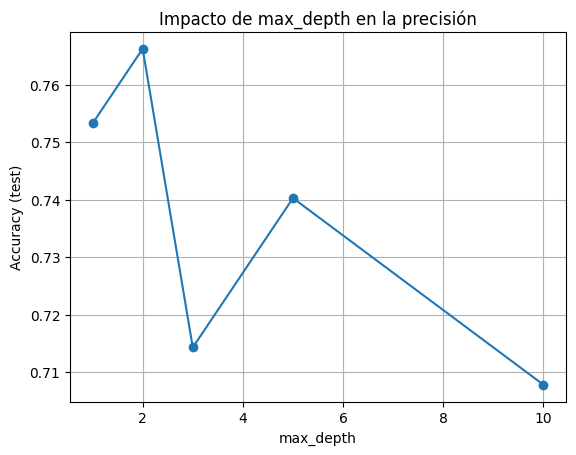

In [68]:
plt.figure()
plt.plot(max_depth_values, accuracies_depth, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy (test)")
plt.title("Impacto de max_depth en la precisión")
plt.grid(True)
plt.show()

max_depth = 2 → accuracy ≈ 0.77 ⬆️ (mejor)

In [69]:
min_samples_leaf_values = [1, 5, 10, 20, 50]
accuracies_leaf = []

for leaf in min_samples_leaf_values:
    rf = RandomForestBootstrap(
        n_estimators=5,
        max_depth=2,                         # FIJO
        min_samples_leaf=leaf,
        max_features=X_train.shape[1] // 2,
        random_state=42,
        X=X_train,
        y=y_train
    )

    rf.fit()
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_leaf.append(acc)

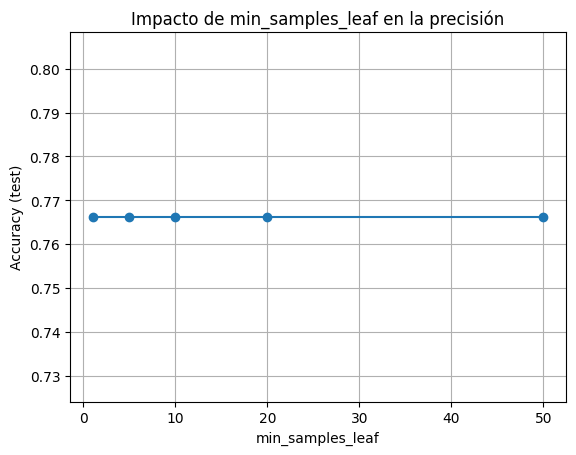

In [70]:
plt.figure()
plt.plot(min_samples_leaf_values, accuracies_leaf, marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy (test)")
plt.title("Impacto de min_samples_leaf en la precisión")
plt.grid(True)
plt.show()

Al analizar el parámetro min_samples_leaf, se observa que la precisión del modelo permanece prácticamente constante para todos los valores evaluado